In [2]:
from typing import Dict,TypedDict
from langgraph.graph import StateGraph

In [3]:
class Agent(TypedDict):
    name : str
    age : str
    final : str

In [10]:
def firstnode(state:Agent)->Agent:
    state['final']=f"{state['name']}"
    return state

def secondnode(state:Agent)->Agent:
    state['final']+=f",{state['age']}"
    return state

In [11]:
graph=StateGraph(Agent)
graph.add_node("name",firstnode)
graph.add_node("age",secondnode)

graph.set_entry_point("name")
graph.add_edge("name","age")
graph.set_finish_point("age")
app=graph.compile()

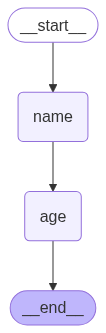

In [12]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [13]:
res=app.invoke({"name":"bob","age":"12"})
print(res)

{'name': 'bob', 'age': '12', 'final': 'bob,12'}
